In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from ast import literal_eval
from matplotlib_venn import venn3
from matplotlib_venn import venn2

# Input

In [4]:
EXP = 'exp3.2.2'
FILE = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/" + EXP + "_CAT_IONTORRENT_KMA_AKB/tables/tcr_barcode.cleaned.csv"
df1 = pd.read_csv(FILE)

In [5]:
EXP = 'exp3'
FILE = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/" + EXP + "_CAT_IONTORRENT_KMA_AKB/tables/tcr_barcode.cleaned.csv"
df2 = pd.read_csv(FILE)

# Main

## Total GEMs

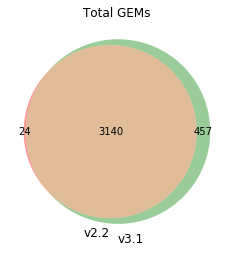

In [6]:
a = set(df1.gem)
b = set(df2.gem)

ab = len(a.intersection(b))
a_b = len(a) - ab
b_a = len(b) - ab

title = "Total GEMs"
venn2(subsets = (a_b, b_a, ab), set_labels = ('v2.2', 'v3.1'))
plt.title(title)
plt.show()

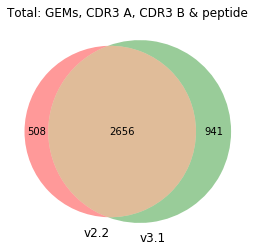

In [8]:
a = set(list(zip(df1.gem, df1.cdr3_TRA, df1.cdr3_TRB, df1.peptide)))
b = set(list(zip(df2.gem, df2.cdr3_TRA, df2.cdr3_TRB, df2.peptide)))

ab = len(a.intersection(b))
a_b = len(a) - ab
b_a = len(b) - ab

title = "Total: GEMs, CDR3 A, CDR3 B & peptide"
venn2(subsets = (a_b, b_a, ab), set_labels = ('v2.2', 'v3.1'))
plt.title(title)
plt.show()

## References

In [12]:
ref1 = df1[((df1.multiplets_mhc == 1) &
            (df1.chain_count_TRA == 1) &
            (df1.chain_count_TRB == 1) &
            (df1.binding_concordance >= 0.5))]
ref2 = df2[((df2.multiplets_mhc == 1) &
            (df2.chain_count_TRA == 1) &
            (df2.chain_count_TRB == 1) &
            (df2.binding_concordance >= 0.5))]

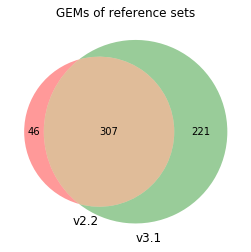

In [13]:
a = set(ref1.gem)
b = set(ref2.gem)

ab = len(a.intersection(b))
a_b = len(a) - ab
b_a = len(b) - ab

title = "GEMs of reference sets"
venn2(subsets = (a_b, b_a, ab), set_labels = ('v2.2', 'v3.1'))
plt.title(title)
plt.show()

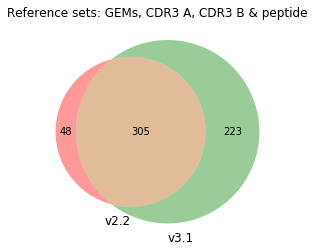

In [24]:
a = set(list(zip(ref1.gem, ref1.cdr3_TRA, ref1.cdr3_TRB, ref1.peptide)))
b = set(list(zip(ref2.gem, ref2.cdr3_TRA, ref2.cdr3_TRB, ref2.peptide)))

ab = len(a.intersection(b))
a_b = len(a) - ab
b_a = len(b) - ab

title = "Reference sets: GEMs, CDR3 A, CDR3 B & peptide"
venn2(subsets = (a_b, b_a, ab), set_labels = ('v2.2', 'v3.1'))
plt.title(title)
plt.show()

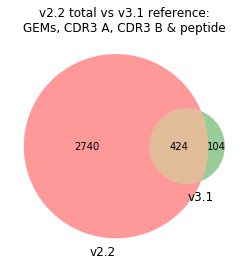

In [25]:
a = set(list(zip(df1.gem, df1.cdr3_TRA, df1.cdr3_TRB, df1.peptide)))
b = set(list(zip(ref2.gem, ref2.cdr3_TRA, ref2.cdr3_TRB, ref2.peptide)))

ab = len(a.intersection(b))
a_b = len(a) - ab
b_a = len(b) - ab

title = "v2.2 total vs v3.1 reference:\nGEMs, CDR3 A, CDR3 B & peptide"
venn2(subsets = (a_b, b_a, ab), set_labels = ('v2.2', 'v3.1'))
plt.title(title)
plt.show()

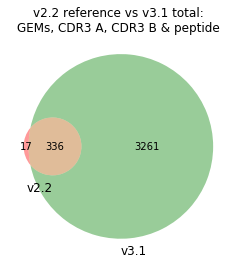

In [26]:
a = set(list(zip(ref1.gem, ref1.cdr3_TRA, ref1.cdr3_TRB, ref1.peptide)))
b = set(list(zip(df2.gem, df2.cdr3_TRA, df2.cdr3_TRB, df2.peptide)))

ab = len(a.intersection(b))
a_b = len(a) - ab
b_a = len(b) - ab

title = "v2.2 reference vs v3.1 total:\nGEMs, CDR3 A, CDR3 B & peptide"
venn2(subsets = (a_b, b_a, ab), set_labels = ('v2.2', 'v3.1'))
plt.title(title)
plt.show()

In [19]:
a- a.intersection(b)

{('AAATGCCTCCTAGAAC-1', 'CAGTTGTYKYIF', 'CASSQDSGLAGGDTQYF', 'KTWGQYWQV'),
 ('ACTGAGTGTTAAGATG-1', 'CALANARLMF', 'CASSTQTEPQYF', 'IMDQVPFSV'),
 ('AGGTCCGTCCGTAGGC-1', 'CAVVLGGGSQGNLIF', 'CSASKREVWNIQYF', 'KVHPVIWSL'),
 ('ATCCACCCAGCGTTCG-1', 'CAESWTNTGFQKLVF', 'CASSYSQVGARVNEKLFF', 'SLAAYIPRL'),
 ('CCTATTAGTCTAGTGT-1', 'CAYAGNMLTF', 'CASRTGTSDHEQYF', 'YSEHPTFTSQY'),
 ('CTCGTACGTAGTGAAT-1', 'CAVRDNNQGGKLIF', 'CSAHPPGQGWEKLFF', 'VTEHDTLLY'),
 ('CTGGTCTTCCACTGGG-1', 'CLVGYNTDKLIF', 'CASSEDRGPYNGETQYF', 'ELRRKMMYM'),
 ('CTGGTCTTCTCGTATT-1', 'CLVGGGSQGNLIF', 'CASSLGQGQGETQYF', 'YSEHPTFTSQY'),
 ('GAACCTATCTGGAGCC-1', 'CAVRDNNQGGKLIF', 'CSAHPPGQGWEKLFF', 'VTEHDTLLY'),
 ('GAATAAGCAATGAAAC-1',
  'CAFRARVDYGGSQGNLIF',
  'CSARDLLQRGGPYNEQFF',
  'SLAAYIPRL'),
 ('GCAAACTGTTCGAATC-1', 'CAVRDNNQGGKLIF', 'CSAHPPGQGWEKLFF', 'VTEHDTLLY'),
 ('GCAAACTTCTTGCATT-1', 'CAERDSWGKFQF', 'CSGDLGRQNTEAFF', 'NLVPMVATV'),
 ('TAAGTGCAGGCGCTCT-1', 'CAYSFSGTYKYIF', 'CASRPRLDGLYQETQYF', 'SLAAYIPRL'),
 ('TACCTATAGCAAATCA

In [23]:
df2[~(df2.num_clonotype == 0)]

,gem,clonotype,num_clonotype,ct,length_TRA,cdr3_TRA,umi_count_TRA,umi_count_lst_TRA,cdr3_lst_TRA,chain_count_TRA,...,v40,v41,v5,v6,v7,v8,v9,gems_per_specificity,gems_per_clonotype,binding_concordance
1,AAACCTGAGTTCGATC-1,clonotype12,12.0,31.0,517.0,CALNTGGFKTIF,4.0,[4],['CALNTGGFKTIF'],1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2,10,0.200000
3,AAACCTGGTCTTGTCC-1,clonotype1,1.0,4.0,520.0,CAAKSDSGGGADGLTF,3.0,[3],['CAAKSDSGGGADGLTF'],1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,223,0.008969
4,AAACCTGTCCATGAGT-1,clonotype10,10.0,29.0,456.0,CAAGGGGNKLTF,2.0,[2],['CAAGGGGNKLTF'],1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,9,0.333333
5,AAACGGGAGTTCCACA-1,clonotype152,152.0,567.0,526.0,CAMREGETSYDKVIF,17.0,[17],['CAMREGETSYDKVIF'],1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,0.500000
6,AAACGGGCAGGTCTCG-1,clonotype4,4.0,13.0,565.0,CAARPGAQKLVF,6.0,[6],['CAARPGAQKLVF'],1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,124,0.016129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571,TTCGGTCGTTCGTCTC-1,clonotype2311,2311.0,2085.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,1,1.000000
3573,TTCTACATCCACGAAT-1,clonotype529,529.0,1234.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,1,1.000000
3575,TTCTCCTAGCGTGAGT-1,clonotype172,172.0,397.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,0.500000
3582,TTGCCGTAGCTAGCCC-1,clonotype5,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,55,0.581818
